<a href="https://colab.research.google.com/github/karima33/python_projects/blob/main/ToDo_CP_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPool2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [13]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [14]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("/content/train_happy.h5","/content/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.


# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))





number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


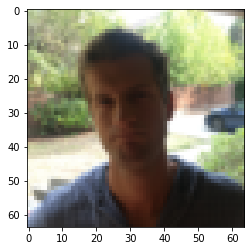

In [15]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


#Output Layer
model.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
#Adam
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])

In [51]:
history_model = model.fit(x = X_train, y = Y_train, epochs = 5, batch_size = 10)

Epoch 1/5
60/60 [==============================] - 34s 521ms/step - loss: 0.1236 - accuracy: 0.9633
Epoch 2/5
60/60 [==============================] - 26s 438ms/step - loss: 0.0954 - accuracy: 0.9667
Epoch 3/5
60/60 [==============================] - 27s 454ms/step - loss: 0.0871 - accuracy: 0.9817
Epoch 4/5
60/60 [==============================] - 25s 413ms/step - loss: 0.0690 - accuracy: 0.9833
Epoch 5/5
60/60 [==============================] - 25s 419ms/step - loss: 0.1260 - accuracy: 0.9683


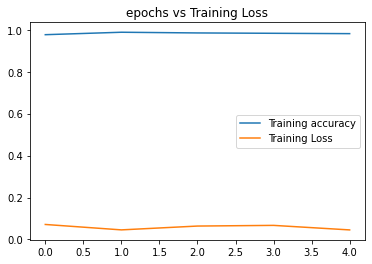

In [56]:
from keras.callbacks import History 
# summarize history for accuracy
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [66]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

5/5 [==============================] - 1s 253ms/step


Evaluate Test set

In [64]:
preds = model.evaluate(x = X_test, y = Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 254ms/step - loss: 0.1076 - accuracy: 0.9867

Loss = 0.10756442695856094
Test Accuracy = 0.9866666793823242


Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,classes_x)
print(cm)

[[66  0]
 [84  0]]


In [48]:
#RMSprop
model.compile(optimizer="RMSprop", loss='binary_crossentropy', metrics=["accuracy"])

In [59]:
history_model_RMSprop = model.fit(x = X_train, y = Y_train, epochs = 5, batch_size = 10)

Epoch 1/5
60/60 [==============================] - 29s 479ms/step - loss: 0.0688 - accuracy: 0.9750
Epoch 2/5
60/60 [==============================] - 25s 418ms/step - loss: 0.0442 - accuracy: 0.9833
Epoch 3/5
60/60 [==============================] - 26s 430ms/step - loss: 0.0296 - accuracy: 0.9933
Epoch 4/5
60/60 [==============================] - 24s 398ms/step - loss: 0.0614 - accuracy: 0.9850
Epoch 5/5
60/60 [==============================] - 24s 403ms/step - loss: 0.0601 - accuracy: 0.9817


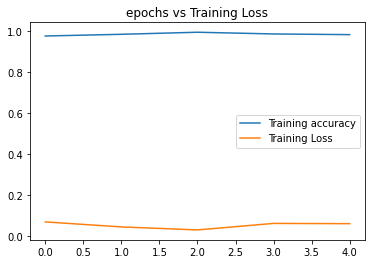

In [60]:
from keras.callbacks import History 
# summarize history for accuracy
train_accuracy =history_model_RMSprop.history['accuracy']
train_loss = history_model_RMSprop.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()


In [55]:
preds = model.evaluate(x = X_test, y = Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 2s 378ms/step - loss: 0.1583 - accuracy: 0.9667

Loss = 0.15827789902687073
Test Accuracy = 0.9666666388511658
